# Import Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import calinski_harabasz_score
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats 
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Part 1. Hierarchical clustering algorithm

## Pre-task execution

In [2]:
file_name = 'Worldbank_tech.xlsx'

df = pd.read_excel(file_name)
df.head()

,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile
0,Afghanistan,AFG,8.260000,1.414229,72.652794,9.053154,0.343677,NaN,61.577619
1,Albania,ALB,63.252933,37.727137,25.303169,11.124101,7.091628,15123662.0,106.380207
2,Algeria,DZA,38.200000,2.546228,59.256825,58.012028,8.041628,2449466.0,113.031094
3,American Samoa,ASM,NaN,72.022759,NaN,NaN,18.005690,NaN,NaN
4,Andorra,ADO,96.910000,1631.830630,NaN,NaN,47.992588,NaN,88.123533


In [3]:
vars_to_analysis = ['internet', 'hightech', 'export', 'secure']
df = df.dropna(subset=vars_to_analysis)

In [4]:
df.head()

,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile
1,Albania,ALB,63.252933,37.727137,25.303169,11.124101,7.091628,1.512366e+07,106.380207
2,Algeria,DZA,38.200000,2.546228,59.256825,58.012028,8.041628,2.449466e+06,113.031094
7,Argentina,ARG,69.400921,63.293537,49.760189,37.910044,24.006501,1.442451e+09,143.907797
8,Armenia,ARM,58.249332,49.043779,25.748135,12.046667,18.443622,1.106779e+07,115.145509
9,Aruba,ABW,88.661227,279.144086,14.764849,44.060914,33.689804,1.194859e+06,135.721780


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 1 to 216
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  113 non-null    object 
 1   country_code  113 non-null    object 
 2   internet      113 non-null    float64
 3   secure        113 non-null    float64
 4   export        113 non-null    float64
 5   import        99 non-null     float64
 6   telephone     113 non-null    float64
 7   hightech      113 non-null    float64
 8   mobile        113 non-null    float64
dtypes: float64(7), object(2)
memory usage: 8.8+ KB


In [6]:
vars_to_analysis = ['internet', 'hightech', 'export', 'secure']

def get_vars_to_analysis():
    res = []
    for i in vars_to_analysis:
        res.append('z_' + i)

    return res

## Task 1. Define the number of cluster

In [7]:
for var in vars_to_analysis:
    df['z_' + var] = (df[var] - df[var].mean())/df[var].std()

Z = linkage(df[get_vars_to_analysis()], method='ward', metric='euclidean') 

In [8]:
for k in range (2, 10):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(df[get_vars_to_analysis()], labels)))

Number of clusters: 2, index 50.247093701859434
Number of clusters: 3, index 50.40578237527972
Number of clusters: 4, index 51.174499884688586
Number of clusters: 5, index 52.19925663074779
Number of clusters: 6, index 57.8375025666012
Number of clusters: 7, index 62.0948486870024
Number of clusters: 8, index 66.24442515136798
Number of clusters: 9, index 69.9437936405062


All in all: number of clusters = 3 (using method 'ward'). For another methods, number of clusters should be 2

That number was chosen according the created dendrograms in task 4. The distance between joining (height). If two clusters are merged, the dendrogram will join them in a graph and the height of the join will be the distance between those clusters.

In [14]:
labels = fcluster(Z, t=3, criterion='maxclust')
labels

array([1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1], dtype=int32)

In [15]:
df['cluster_labels'] = labels

## Task 2. Create a dendrogram 
(explanation in the task 1)

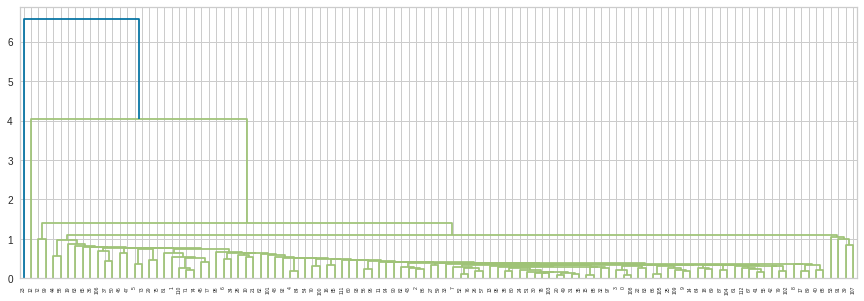

In [9]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df[get_vars_to_analysis()], 'single'))
#Nearest neighbor / Single-linkage

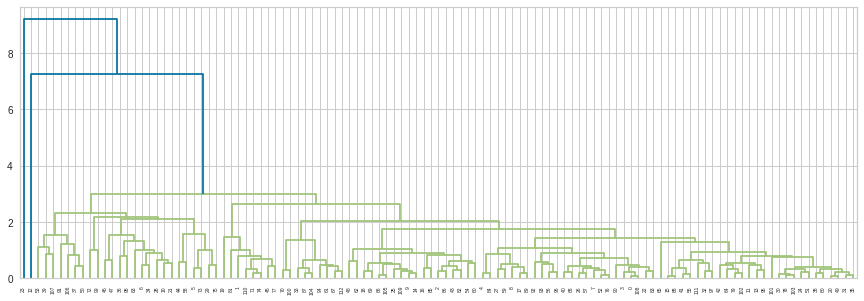

In [10]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df[get_vars_to_analysis()], 'average'))
#Average Linkage / Between Groups Linkage

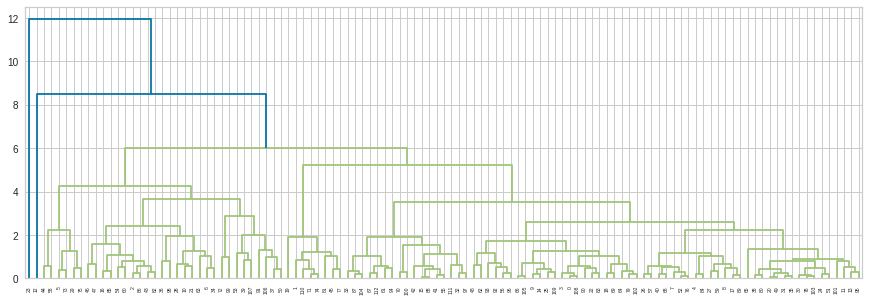

In [11]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df[get_vars_to_analysis()], 'complete'))
#Furthest neighbor / Complete-linkage

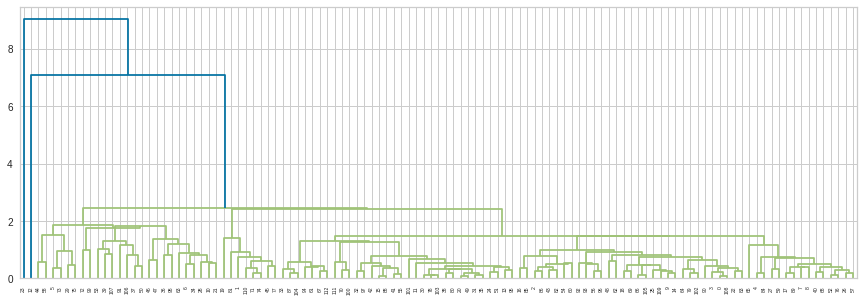

In [12]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df[get_vars_to_analysis()], 'centroid'))
#Centroid Clustering

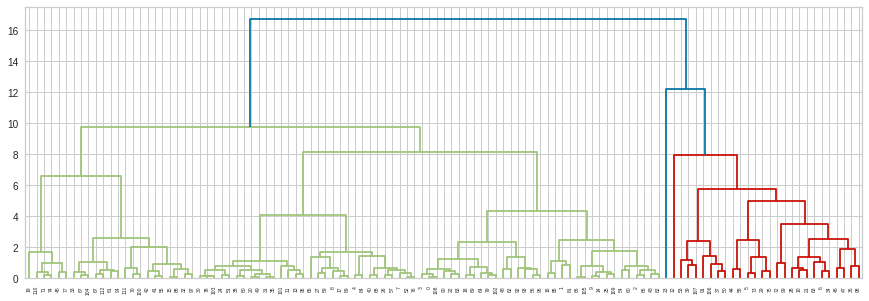

In [13]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df[get_vars_to_analysis()], 'ward'))
#Ward's Method

## Task 3. Save to file

In [16]:
df

,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile,z_internet,z_hightech,z_export,z_secure,cluster_labels
1,Albania,ALB,63.252933,37.727137,25.303169,11.124101,7.091628,1.512366e+07,106.380207,0.159218,-0.295166,-0.449476,-0.495612,1
2,Algeria,DZA,38.200000,2.546228,59.256825,58.012028,8.041628,2.449466e+06,113.031094,-0.845304,-0.295376,1.275067,-0.531546,1
7,Argentina,ARG,69.400921,63.293537,49.760189,37.910044,24.006501,1.442451e+09,143.907797,0.405727,-0.271473,0.792723,-0.469499,1
8,Armenia,ARM,58.249332,49.043779,25.748135,12.046667,18.443622,1.106779e+07,115.145509,-0.041407,-0.295233,-0.426876,-0.484053,1
9,Aruba,ABW,88.661227,279.144086,14.764849,44.060914,33.689804,1.194859e+06,135.721780,1.177988,-0.295397,-0.984729,-0.249029,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Uruguay,URY,64.600000,106.657186,25.607852,21.481726,32.257492,2.661192e+08,160.209644,0.213230,-0.290999,-0.434001,-0.425207,1
213,West Bank and Gaza,WBG,57.424192,5.653368,44.171827,NaN,8.936393,5.099724e+06,77.624612,-0.074491,-0.295332,0.508884,-0.528372,1
214,"Yemen, Rep.",YEM,25.099514,0.633567,56.462032,NaN,4.679835,2.946931e+06,67.980973,-1.370581,-0.295368,1.133116,-0.533500,1
215,Zambia,ZMB,21.000000,4.317851,8.549899,NaN,0.748505,3.650318e+07,74.471778,-1.534955,-0.294811,-1.300393,-0.529737,1


In [17]:
df.to_csv('WorldBank_cluster.csv', index=False)

## Task 4. Describe the cluster using descriptive statistics

In [18]:
df.groupby('cluster_labels')[get_vars_to_analysis()].mean()

,z_internet,z_hightech,z_export,z_secure
cluster_labels,,,,
1,-0.345154,-0.237700,-0.215623,-0.407115
2,1.155515,0.443728,0.693671,1.366757
3,-0.360143,8.905263,0.508094,-0.523813


In [19]:
df['cluster_labels'].value_counts()

1    86
2    26
3     1
Name: cluster_labels, dtype: int64

Cluster 1: This cluster contains contries with the worst developed technologies, because internet, hightet, export and secure mean values are negative.

Cluster 2: This cluster contains contries with the best developed technologies, because intherner higher, export and security mean values are positive and high.

Cluster 3: cluster contains only 1 row. It means, that this cluster doesn't inform us about anything. It likes a blowout of data or error in data. Ignore it in future analysis (data support that idea. Interner mean is negative, but hightech is highly positive)

## Task 5. Give names of the obtained clusters

Names was chosen according to the last step. <br> 
Cluster 1 = Secondary developed countries (This cluster contains contries with the worst developed technologies, because internet, hightet, export and secure mean values are negative.). <br> 
Cluster 2 = Primary developed countries (This cluster contains contries with the best developed technologies, because intherner higher, export and security mean values are positive and high.). <br> 
Cluster 3 = IGNORE (Error data) (cluster contains only 1 row. It means, that this cluster doesn't inform us about anything. It likes a blowout of data or error in data. Ignore it in future analysis (data support that idea. Interner mean is negative, but hightech is highly positive))

In [22]:
df['cluster_labels'] = df['cluster_labels'].replace(1, 'Secondary developed countries')
df['cluster_labels'] = df['cluster_labels'].replace(2, 'Primary developed countries')
df['cluster_labels'] = df['cluster_labels'].replace(3, 'IGNORE (Error data)')

df.groupby('cluster_labels').head()

,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile,z_internet,z_hightech,z_export,z_secure,cluster_labels
1,Albania,ALB,63.252933,37.727137,25.303169,11.124101,7.091628,1.512366e+07,106.380207,0.159218,-0.295166,-0.449476,-0.495612,Secondary developed countries
2,Algeria,DZA,38.200000,2.546228,59.256825,58.012028,8.041628,2.449466e+06,113.031094,-0.845304,-0.295376,1.275067,-0.531546,Secondary developed countries
7,Argentina,ARG,69.400921,63.293537,49.760189,37.910044,24.006501,1.442451e+09,143.907797,0.405727,-0.271473,0.792723,-0.469499,Secondary developed countries
8,Armenia,ARM,58.249332,49.043779,25.748135,12.046667,18.443622,1.106779e+07,115.145509,-0.041407,-0.295233,-0.426876,-0.484053,Secondary developed countries
9,Aruba,ABW,88.661227,279.144086,14.764849,44.060914,33.689804,1.194859e+06,135.721780,1.177988,-0.295397,-0.984729,-0.249029,Secondary developed countries
10,Australia,AUS,84.560519,1460.945843,24.133141,31.515563,37.954946,4.237457e+09,132.800509,1.013566,-0.225077,-0.508903,0.958064,Primary developed countries
11,Austria,AUT,83.926300,1500.507253,38.662816,45.395184,42.182763,1.594744e+10,157.408264,0.988137,-0.030696,0.229075,0.998472,Primary developed countries
18,Belgium,BEL,85.052900,976.898153,59.121119,54.047314,40.137226,3.885596e+10,115.690785,1.033309,0.349575,1.268174,0.463658,Primary developed countries
21,Bermuda,BMU,98.323610,7204.721392,45.766384,27.760657,18.298820,1.013119e+06,57.946262,1.565411,-0.295400,0.589873,6.824760,Primary developed countries
35,Canada,CAN,88.470000,1308.777635,52.310708,37.908019,44.330725,2.629547e+10,81.930588,1.170321,0.141076,0.922266,0.802640,Primary developed countries


## Task 6. Post-hoc analysis

In [23]:
means = df.groupby('cluster_labels')[get_vars_to_analysis()].mean()
means

,z_internet,z_hightech,z_export,z_secure
cluster_labels,,,,
IGNORE (Error data),-0.360143,8.905263,0.508094,-0.523813
Primary developed countries,1.155515,0.443728,0.693671,1.366757
Secondary developed countries,-0.345154,-0.237700,-0.215623,-0.407115


In [24]:
group_primary = df[df['cluster_labels'] == 'Primary developed countries'][get_vars_to_analysis()]
group_seconary = df[df['cluster_labels'] == 'Secondary developed countries'][get_vars_to_analysis()]

In [48]:
stats.f_oneway(group_primary, group_seconary)

F_onewayResult(statistic=array([ 73.91436799,  44.8865886 ,  19.0663875 , 141.30393441]), pvalue=array([6.24227064e-14, 9.24705069e-10, 2.86637112e-05, 1.85330629e-21]))

In [33]:
def get_col_without_ignore(col_name):
    return df[df['cluster_labels'] != 'IGNORE (Error data)'][col_name]

**COMMENT: POST-HOC ANALYSIS HAS ERROR IN EXECUTION DUE TO ONLY 2 CLUSTERS (AFTER DELETING ERROR DATA CLUSTER). THAT'S WHY IT'S IMPOSSIBLE TO INTERPRETE RESULTS** <BR>
**There are two execution. One error execution due to deleted error cluster. The second one with it. But explanation was about comparison of the 2 needed clusters**

### For internet

In [53]:
print(pairwise_tukeyhsd(get_col_without_ignore('z_internet'), get_col_without_ignore('cluster_labels')))

TypeError: ignored

In [57]:
print(pairwise_tukeyhsd(df['z_internet'], df['cluster_labels']))

                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
           group1                       group2            meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------
        IGNORE (Error data)   Primary developed countries   1.5157 0.1415 -0.3727   3.404  False
        IGNORE (Error data) Secondary developed countries    0.015    0.9 -1.8488  1.8788  False
Primary developed countries Secondary developed countries  -1.5007  0.001 -1.9154 -1.0859   True
------------------------------------------------------------------------------------------------


Explanation group1 = 'Primary developed contries', group2 = 'Secondary developed countries'. <br> Reject = true means that group1 and group2 have statistically significant difference. It means that clusters are correct.

### For Hightech

In [54]:
print(pairwise_tukeyhsd(get_col_without_ignore('z_hightech'), get_col_without_ignore('cluster_labels')))

TypeError: ignored

In [58]:
print(pairwise_tukeyhsd(df['z_hightech'], df['cluster_labels']))

                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                       group2            meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------------------------------------
        IGNORE (Error data)   Primary developed countries  -8.4615 0.001 -9.5619 -7.3612   True
        IGNORE (Error data) Secondary developed countries   -9.143 0.001 -10.229 -8.0569   True
Primary developed countries Secondary developed countries  -0.6814 0.001 -0.9231 -0.4398   True
-----------------------------------------------------------------------------------------------


Explanation group1 = 'Primary developed contries', group2 = 'Secondary developed countries'. <br> Reject = true means that group1 and group2 have statistically significant difference. It means that clusters are correct.

### For Export

In [55]:
print(pairwise_tukeyhsd(get_col_without_ignore('z_export'), get_col_without_ignore('cluster_labels')))

TypeError: ignored

In [59]:
print(pairwise_tukeyhsd(df['z_export'], df['cluster_labels']))

                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
           group1                       group2            meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------
        IGNORE (Error data)   Primary developed countries   0.1856    0.9 -2.0673  2.4385  False
        IGNORE (Error data) Secondary developed countries  -0.7237 0.7025 -2.9473  1.4999  False
Primary developed countries Secondary developed countries  -0.9093  0.001 -1.4041 -0.4145   True
------------------------------------------------------------------------------------------------


Explanation group1 = 'Primary developed contries', group2 = 'Secondary developed countries'. <br> Reject = true means that group1 and group2 have statistically significant difference. It means that clusters are correct.

### For Secure

In [56]:
print(pairwise_tukeyhsd(get_col_without_ignore('z_secure'), get_col_without_ignore('cluster_labels')))

TypeError: ignored

In [60]:
print(pairwise_tukeyhsd(df['z_secure'], df['cluster_labels']))

                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
           group1                       group2            meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------
        IGNORE (Error data)   Primary developed countries   1.8906 0.0173  0.2762   3.505   True
        IGNORE (Error data) Secondary developed countries   0.1167    0.9 -1.4767  1.7101  False
Primary developed countries Secondary developed countries  -1.7739  0.001 -2.1284 -1.4193   True
------------------------------------------------------------------------------------------------


Explanation group1 = 'Primary developed contries', group2 = 'Secondary developed countries'. <br> Reject = true means that group1 and group2 have statistically significant difference. It means that clusters are correct.

# Part 2. K-mean algorithm

## Pre-task execution

In [62]:
file_name = 'Video_Games_Sales.csv'

df = pd.read_csv(file_name)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df = df[df['User_Score'] != 'tbd']
df['User_Score'] = pd.to_numeric(df['User_Score'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
vars_to_analysis = ['User_Score', 'Critic_Score', 'Global_Sales', 'Year_of_Release']
df = df.dropna(subset=vars_to_analysis)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 0 to 16709
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6894 non-null   object 
 1   Platform         6894 non-null   object 
 2   Year_of_Release  6894 non-null   float64
 3   Genre            6894 non-null   object 
 4   Publisher        6893 non-null   object 
 5   NA_Sales         6894 non-null   float64
 6   EU_Sales         6894 non-null   float64
 7   JP_Sales         6894 non-null   float64
 8   Other_Sales      6894 non-null   float64
 9   Global_Sales     6894 non-null   float64
 10  Critic_Score     6894 non-null   float64
 11  Critic_Count     6894 non-null   float64
 12  User_Score       6894 non-null   float64
 13  User_Count       6894 non-null   float64
 14  Developer        6890 non-null   object 
 15  Rating           6826 non-null   object 
dtypes: float64(10), object(6)
memory usage: 915.6+ KB


In [66]:
def get_vars_to_analysis():
    res = []
    for i in vars_to_analysis:
        res.append('z_' + i)

    return res

## Task 1. Define the number of clusters

In [70]:
for var in vars_to_analysis:
    df['z_' + var] = (df[var] - df[var].mean())/df[var].std()

X = df[get_vars_to_analysis()]
X

,z_User_Score,z_Critic_Score,z_Global_Sales,z_Year_of_Release
0,0.566481,0.414218,41.824926,-0.349897
2,0.774842,0.847085,17.776179,0.122202
3,0.566481,0.702796,16.369371,0.358251
6,0.913750,1.352096,14.850018,-0.349897
7,-0.405873,-0.884382,14.399840,-0.349897
...,...,...,...,...
16677,1.122111,0.774941,-0.389551,-1.294094
16696,0.288666,0.702796,-0.389551,1.538498
16700,-0.961503,-0.667948,-0.389551,0.830350
16706,0.010850,-0.740093,-0.389551,0.830350


In [71]:
for k in range (2, 15):
    labels = KMeans(n_clusters=k).fit_predict(X)
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(X, labels)))

Number of clusters: 2, index 2475.219144658177
Number of clusters: 3, index 2384.944834300546
Number of clusters: 4, index 2532.584571090986
Number of clusters: 5, index 2420.2149209115214
Number of clusters: 6, index 2387.9189475030985
Number of clusters: 7, index 2326.513367602073
Number of clusters: 8, index 2281.2489717310423
Number of clusters: 9, index 2245.065996137785
Number of clusters: 10, index 2193.9217132790272
Number of clusters: 11, index 2149.8687342953594
Number of clusters: 12, index 2105.6769712661694
Number of clusters: 13, index 2078.575156271997
Number of clusters: 14, index 2051.9683605163355


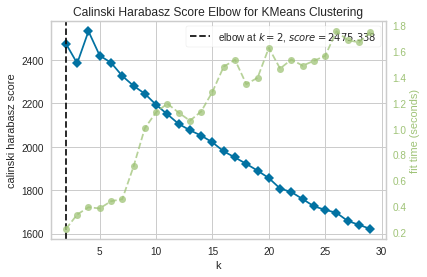

In [72]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(df[get_vars_to_analysis()])
visualizer.show()

According to the figure, the Calinski Harabasz Index maximized at the number of cluster equal to 4

## Task 2. Save to cluster

In [73]:
kmeans_model = KMeans(n_clusters=4).fit_predict(X)
df['clusters'] = kmeans_model
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Critic_Count,User_Score,User_Count,Developer,Rating,z_User_Score,z_Critic_Score,z_Global_Sales,z_Year_of_Release,clusters
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,...,51.0,8.0,322.0,Nintendo,E,0.566481,0.414218,41.824926,-0.349897,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,73.0,8.3,709.0,Nintendo,E,0.774842,0.847085,17.776179,0.122202,0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,73.0,8.0,192.0,Nintendo,E,0.566481,0.702796,16.369371,0.358251,0
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,...,65.0,8.5,431.0,Nintendo,E,0.913750,1.352096,14.850018,-0.349897,0
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,...,41.0,6.6,129.0,Nintendo,E,-0.405873,-0.884382,14.399840,-0.349897,0


In [74]:
df.to_csv('VideoGamesSales_cluster.csv', index=False)

## Task 3. Describe the cluster using descriptive statistics

In [75]:
df.groupby('clusters')[get_vars_to_analysis()].mean()

,z_User_Score,z_Critic_Score,z_Global_Sales,z_Year_of_Release
clusters,,,,
0,0.180478,1.180059,7.906780,0.099505
1,-1.238742,-1.327055,-0.241922,0.040707
2,0.612351,0.367691,-0.039085,-0.822162
3,0.079991,0.399902,0.032301,0.927712


In [76]:
df['clusters'].value_counts()

2    2836
3    2439
1    1567
0      52
Name: clusters, dtype: int64

Cluster 2. The cluster with the oldest games from the list. We can see, that Critics and Users scores was particulary the same (in compare with other clusters) and Global Sales was not so good (3 place for sellings)

Cluster 1. The cluster with the 3d place of rating of years. The people don't like games in that period of time (scores from users and critics are low). Moreover, global sales are less than in cluster with oldest games.

Cluster 3. The cluster with the freshest games in the list. We can see that critics evaluate games more than users. That's the reason why global sales are less than cluster 4 (2nd place of rating of years). Moreover, after cluster 2 period global sales become much better.

Cluster 0. Ther cluster with the 2nd place of rating years. We can see that games sellings was the best from the document. Moreover, critics evaluate games very well (maybe sells and critics scores are connected). In the same time, users evaluate games more than in future years, but the difference between critics scores and users scores are big.

## Task 4. Give names of the obtained clusters

According to the cluster 1-4 description (from the previous task), let's name cluster by years: <br>
Cluster 2 = Oldest games (4 year) <br>
Cluster 0 = Fresher oldest games (3 year) <br>
Cluster 1 = Freshest games (1 year) <br>
Cluster 3 = Older freshest games (2 year)

In [77]:
df['clusters'] = df['clusters'].replace(2, 'Oldest games')
df['clusters'] = df['clusters'].replace(1, 'Fresher oldest games')
df['clusters'] = df['clusters'].replace(3, 'Freshest games')
df['clusters'] = df['clusters'].replace(0, 'Older freshest games')

df.groupby('clusters').head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Critic_Count,User_Score,User_Count,Developer,Rating,z_User_Score,z_Critic_Score,z_Global_Sales,z_Year_of_Release,clusters
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,...,51.0,8.0,322.0,Nintendo,E,0.566481,0.414218,41.824926,-0.349897,Older freshest games
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,73.0,8.3,709.0,Nintendo,E,0.774842,0.847085,17.776179,0.122202,Older freshest games
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,73.0,8.0,192.0,Nintendo,E,0.566481,0.702796,16.369371,0.358251,Older freshest games
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,...,65.0,8.5,431.0,Nintendo,E,0.913750,1.352096,14.850018,-0.349897,Older freshest games
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,...,41.0,6.6,129.0,Nintendo,E,-0.405873,-0.884382,14.399840,-0.349897,Older freshest games
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,...,42.0,4.3,896.0,EA Sports,E,-2.003310,0.847085,3.989459,1.774548,Freshest games
79,Wii Party,Wii,2010.0,Misc,Nintendo,1.75,3.47,2.49,0.67,8.38,...,42.0,7.4,54.0,Nd Cube,E,0.149758,-0.162937,3.892261,0.594301,Freshest games
80,Mario Party 8,Wii,2007.0,Misc,Nintendo,3.74,2.24,1.58,0.70,8.27,...,41.0,6.3,190.0,Hudson,E,-0.614234,-0.595804,3.835989,-0.113847,Freshest games
81,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.01,0.13,1.97,8.16,...,37.0,6.6,348.0,Electronic Arts,E,-0.405873,1.279952,3.779717,1.066400,Freshest games
84,Final Fantasy X,PS2,2001.0,Role-Playing,Sony Computer Entertainment,2.91,2.07,2.73,0.33,8.05,...,53.0,8.7,1056.0,SquareSoft,T,1.052658,1.568529,3.723444,-1.530144,Oldest games


## Task 5. Post-hoc analysis

In [78]:
means = df.groupby('clusters')[get_vars_to_analysis()].mean()
means

,z_User_Score,z_Critic_Score,z_Global_Sales,z_Year_of_Release
clusters,,,,
Fresher oldest games,-1.238742,-1.327055,-0.241922,0.040707
Freshest games,0.079991,0.399902,0.032301,0.927712
Older freshest games,0.180478,1.180059,7.906780,0.099505
Oldest games,0.612351,0.367691,-0.039085,-0.822162


In [79]:
group_oldest = df[df['clusters'] == 'Oldest games'][get_vars_to_analysis()]
group_fresher_oldest = df[df['clusters'] == 'Fresher oldest games'][get_vars_to_analysis()]
group_older_freshest = df[df['clusters'] == 'Older freshest games'][get_vars_to_analysis()]
group_freshest = df[df['clusters'] == 'Freshest games'][get_vars_to_analysis()]

In [80]:
stats.f_oneway(group_oldest, group_fresher_oldest, group_older_freshest, group_freshest)

F_onewayResult(statistic=array([2348.90909471, 2518.79538634, 2170.90402342, 3212.10129074]), pvalue=array([0., 0., 0., 0.]))

### For User Scores

In [81]:
print(pairwise_tukeyhsd(df['z_User_Score'], df['clusters']))

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2        meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------
Fresher oldest games       Freshest games   1.3187  0.001  1.2602 1.3772   True
Fresher oldest games Older freshest games   1.4192  0.001  1.1645  1.674   True
Fresher oldest games         Oldest games   1.8511  0.001  1.7942  1.908   True
      Freshest games Older freshest games   0.1005 0.7129 -0.1528 0.3538  False
      Freshest games         Oldest games   0.5324  0.001  0.4825 0.5823   True
Older freshest games         Oldest games   0.4319  0.001   0.179 0.6848   True
-------------------------------------------------------------------------------


For variable 'z_User_Score', all clusters are statistically significant difference except groups 'Freshest games' and 'Older freshest games'. To make a conclusion about cluster choosing we need to check analysis for other variables.

### For Critic Scores

In [82]:
print(pairwise_tukeyhsd(df['z_Critic_Score'], df['clusters']))

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2        meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------
Fresher oldest games       Freshest games    1.727  0.001  1.6695 1.7844   True
Fresher oldest games Older freshest games   2.5071  0.001  2.2569 2.7573   True
Fresher oldest games         Oldest games   1.6947  0.001  1.6389 1.7506   True
      Freshest games Older freshest games   0.7802  0.001  0.5314 1.0289   True
      Freshest games         Oldest games  -0.0322 0.3298 -0.0812 0.0168  False
Older freshest games         Oldest games  -0.8124  0.001 -1.0608 -0.564   True
-------------------------------------------------------------------------------


For variable 'z_Critic_Score', all clusters are statistically significant difference except groups 'Freshest games' and 'Oldest games'. To make a conclusion about cluster choosing we need to check analysis for other variables.

### For Global Sales

In [83]:
print(pairwise_tukeyhsd(df['z_Global_Sales'], df['clusters']))

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
Fresher oldest games       Freshest games   0.2742  0.001  0.2146  0.3339   True
Fresher oldest games Older freshest games   8.1487  0.001  7.8889  8.4085   True
Fresher oldest games         Oldest games   0.2028  0.001  0.1448  0.2608   True
      Freshest games Older freshest games   7.8745  0.001  7.6162  8.1327   True
      Freshest games         Oldest games  -0.0714 0.0018 -0.1223 -0.0205   True
Older freshest games         Oldest games  -7.9459  0.001 -8.2037  -7.688   True
--------------------------------------------------------------------------------


For variable 'z_Global_Sales', all clusters are statistically significant difference.

### For Year of the Release

In [84]:
print(pairwise_tukeyhsd(df['z_Year_of_Release'], df['clusters']))

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2        meandiff p-adj  lower   upper  reject
-------------------------------------------------------------------------------
Fresher oldest games       Freshest games    0.887 0.001  0.8333  0.9407   True
Fresher oldest games Older freshest games   0.0588   0.9 -0.1751  0.2927  False
Fresher oldest games         Oldest games  -0.8629 0.001 -0.9151 -0.8106   True
      Freshest games Older freshest games  -0.8282 0.001 -1.0608 -0.5956   True
      Freshest games         Oldest games  -1.7499 0.001 -1.7957  -1.704   True
Older freshest games         Oldest games  -0.9217 0.001 -1.1539 -0.6894   True
-------------------------------------------------------------------------------


For variable 'z_Year_of_Release', all clusters are statistically significant difference except groups 'Fresher oldest games' and 'Older freshest games'. To make a conclusion about cluster choosing we need to check analysis for other variables.

### Conclusion

All clusters are statistically significant difference according to sum of the analysis for cluster variables.